# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2207ACDS_teamnd6**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



For this study, we will analyse the Spain Electricity Shortfall dataset. The methodology for this project includes and not limited to exploratory data anlyses and model prediction. To perform these various tasks, the following libraries were loaded:

+ For data manipulation and analysis, Pandas and Numpy.
+ For data visualization, Matplotlib and Seaborn.
+ For data preparation, model building and evaluation, Scipy and Sklearn.


**The importation of these libraries can be seen below:**

In [48]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.graphics.correlation import plot_corr
from seaborn import pairplot

import statsmodels.api as smapi

# Libraries for Data Preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import xgboost as xg
# Libraries for Model Building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Libraries for Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# Libraries for Saving Model
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###



<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


The data used for this project was located in the `df_train.csv` file. To better manipulate and analyse the `df_train.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.


In [49]:
# Loading of the data
df = pd.read_csv("df_train.csv", index_col=False)

To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [50]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

To prevent any major unnecessary changes occurring to the original data, a copy of the dataframe was made using the `df.copy()` method and referred to as `df_copy`.

In [51]:
# The copy of the dataframe
df_copy = df.copy()

In [52]:
df_copy.shape

(8763, 49)

<a id="two"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. 
 

### 3.1 Displaying the Data

The function `.head()` was used to view the first few rows of the dataset.

In [6]:
# Outputs the first 5 rows of the dataset
df_copy.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


***


+ **Results** : An unnamed:0 column that serve as index is shown first in the dataset. This unnamed:0 column will eventually be dropped from the dataframe during the data preprocessing phase as an index column is already present. The dataframe highlights various weather features of cities in Spain i.e. Barcelona, Madrid, Valencia, Bilbao, Seville and Madrid. The load_shortfall_3h is the target variable and is shown in the last column.  Most of the columns consists solely of numeric values except Valenica wind degrees (level status) and Seville pressure (sp: Static pressure) which are categorical. During the data preprocessing phase, categorical values will be encoded to represent numerical values. 

***

### 3.2 Data Anaylses

`.shape` function returned the number of rows by the number of columns in the dataset.

In [7]:
# Displays the number of rows and columns
df_copy.shape

(8763, 49)

***


+ **Results** : The dataset consists of 8763 rows (observations) and 49 columns (features). Of the 49 features, 1 is a response/target variable.



***

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [8]:
# Displays information of the Dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

***


+ **Results** : The `.info` method showcases the 48 columns and 8763 rows contained within the dataframe. All the features have *non-null* attributes which defines the enforcement of a column to not accept any NULL values. The time, Valencia_wind_deg and Seville_pressure columns are of type *'object'* which will be converted to a numeric dtypes via Dummy variable encoding during the preprocessing phase. The unnamed:0 column is a numeric *int64* dtype whereas the 45 other features are of *float64* numeric dtype.
 
 
***

### 3.3 Missing Values

Determining the missing values in the dataset is vital in accurately investigating the relationship between the variables. If not handled correctly it could cause: 
+ Reduction in the power/fit of the model.
+ Have it become a biased model. 

In [9]:
# Outputs the number of missing values
values = pd.DataFrame(df_copy.isnull().sum(), columns=['nulls'])

# Displays the percentage of missing values within the dataset
values["%_of_nulls"]=round(df_copy.isnull().sum()/len(df_copy)*100)
values

,nulls,%_of_nulls
Unnamed: 0,0,0.0
time,0,0.0
Madrid_wind_speed,0,0.0
Valencia_wind_deg,0,0.0
Bilbao_rain_1h,0,0.0
Valencia_wind_speed,0,0.0
Seville_humidity,0,0.0
Madrid_humidity,0,0.0
Bilbao_clouds_all,0,0.0
Bilbao_wind_speed,0,0.0


***


+ **Results** : The above code highlights that the Valencia pressure column is the only column with missing value as its 2068 rows consists of missing values. It can further be said that the column has 24% missing values. The missing values will be dealt with during the Data Engineering phase.

***

### 3.4 Descriptive Statistics

Statistical analyses in EDA is crucial for analysing the features within the dataframe. The method, `.describe()` outputs the **Five-number summary**. This descriptive statistics summaries  the count, mean, standard deviation, min, quartile ranges and max for the numeric variables in our dataframe.

In [10]:
# Displays the summary statistics
df_copy_transposed = df_copy.describe().T

df_copy_transposed

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


***


+ **Results** : The descriptive statistics table above highlights the various cities and their weather categories i.e. temperature, rain, wind, snow etc. The cities are shown to have similar values in regards to their weather categories e.g. minimum rain in Seville and Barcelona etc. A zero value within a row, specify that the particular weather category did not occur for that city.


***

### 3.5  Kurtosis and Skewness

To give additional information about the distribution of our dataset, we had a look at the Skewness (`.skew()`)
and the kurtosis (`.kurtosis()`) functions respectively. Skewness is defined by ita measure of its asymmetry in a probability distribution whereas kurtosis describes the lack or heaviness of the tail (outliers) when compared to normal distribution.

In [11]:
# Skewness of the dataframe
df_copy.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

***


+ **Results** : Features that are fairly symmetrical such as the target variable, load_shortfall_3h falls within the range -0.5 < x < 0.5. 

***

In [12]:
# Kurtosis of the dataframe
df_copy.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

***


+ **Results** : 13 of the 48 features (27%) have a kurtosis of > 3 which means these features have a lot of outliers. The rest of the features have less outlier as is described as low kurtosis.

***

### 3.6 Data Visualization of relevant feature interactions

The following plots displays the various relationships between the types of time measures, features and the load shortfall.

#### 3.6.1 The Numerical Feature Distributions

To investigate the distribution of the various numerical features, `.hist()` method was demonstrated.

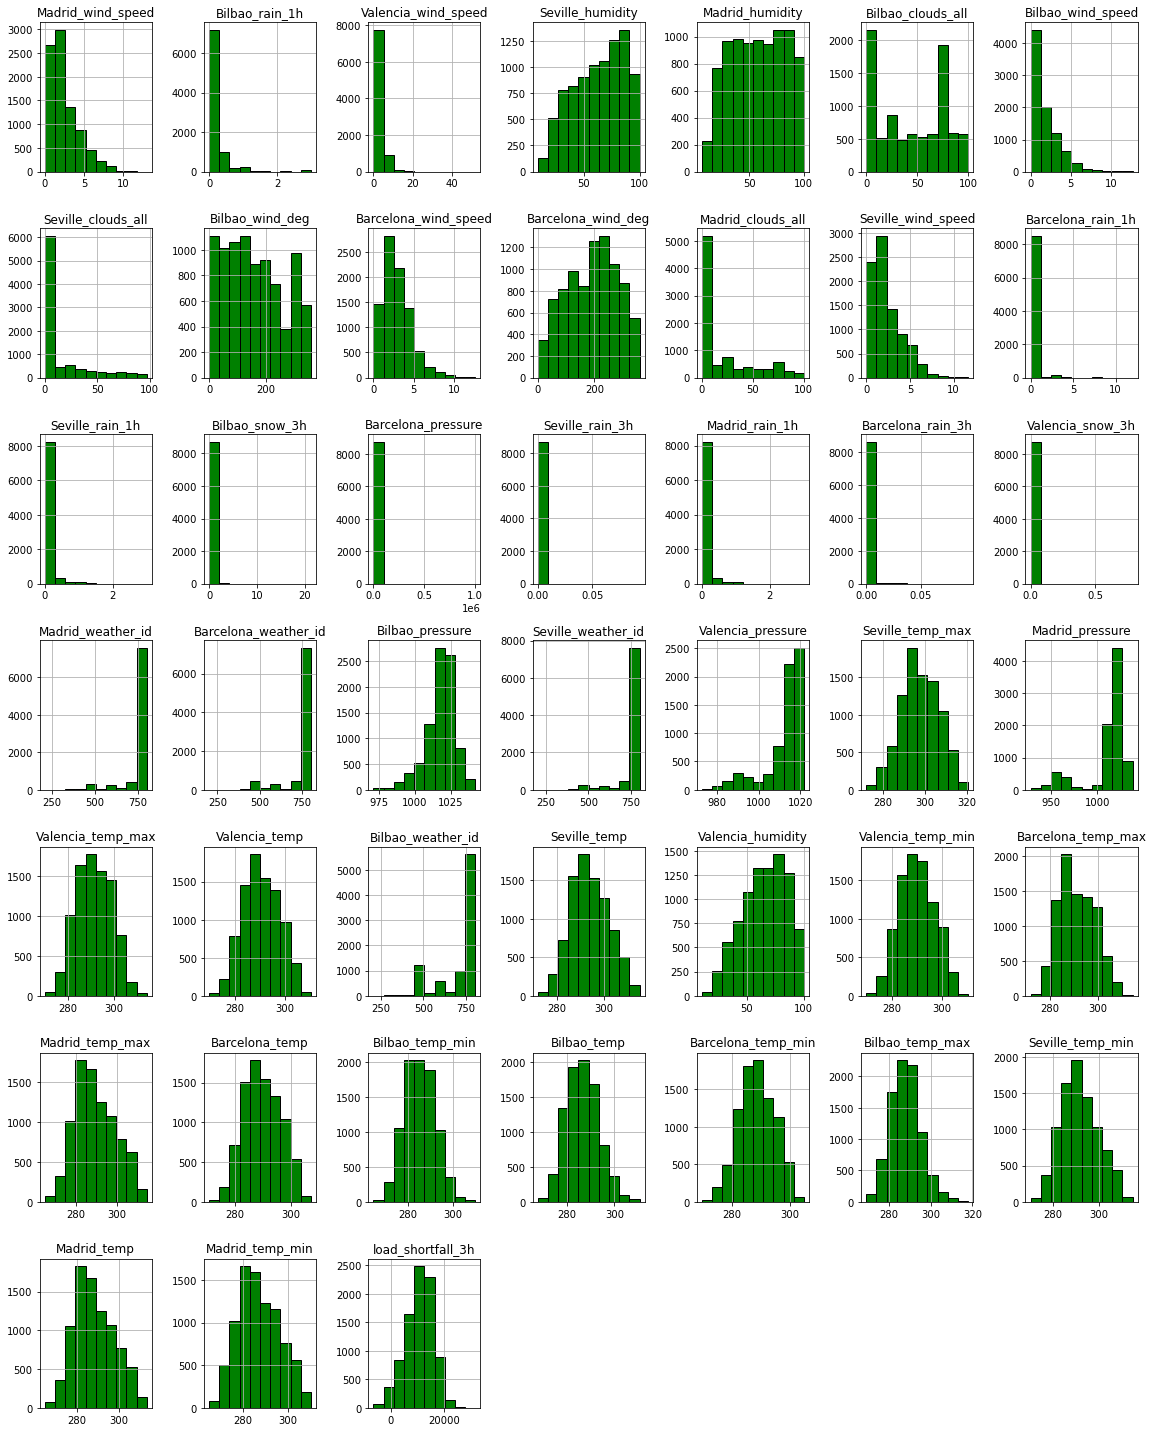

In [13]:
# Displaying the columns with numerical values
y_col = df_copy.select_dtypes(include="float64").columns

# Adjust padding between/around subplots and set figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Creating the plot
axs = df_copy[y_col].hist(figsize=(16, 20),color='green', ec='k')

# Showing the plot
plt.show()

***


+ **Results** : As seen above, the load shortfall is shown to have a fairly symmetrical distribution, which has also been highlighted in `.skew()` method. There are few features such as rain that our heavily skewed as they consist of zero values and has also been demonstrated in the summary statistics (`.describe` method).


***

We decided to have a closer look at the distribution of the target variable, load_shortfall_3h by creating a density plot using the function `sns.displot`.

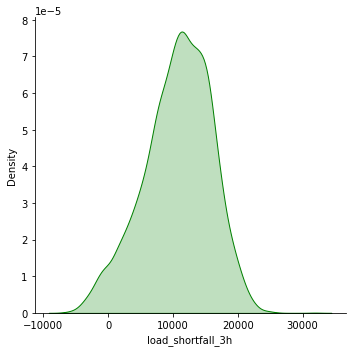

In [14]:
#sns.load_dataset("penguins")
sns.displot(df_copy,x='load_shortfall_3h',kind="kde",fill=True,color="green")

The density plot above characterises the depiction of the target variable, load_shortfall_3h to be close to a normal distribution.

#### 3.6.2 The Categorical Feature Distributions

The load shortfall's relationship with the categorical features i.e. Seville pressure and Valencia wind degree was analysed using `sns.catplot`.

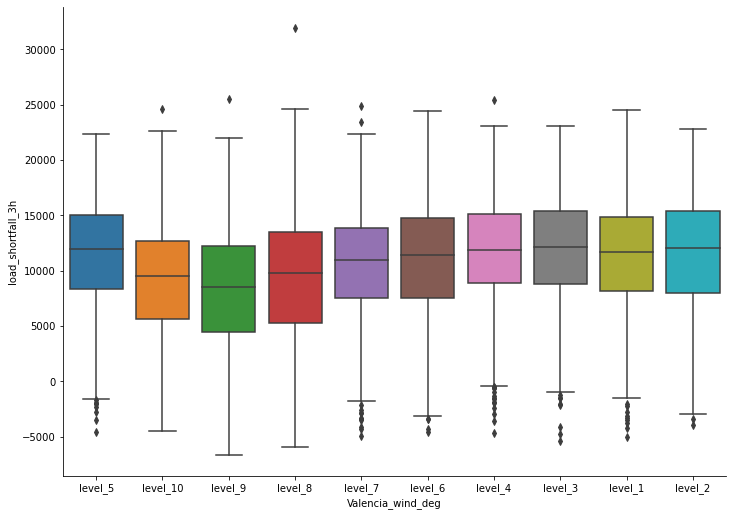

In [15]:
# Displays the relationship between the load shortfall and Valencia wind degrees

sns.catplot(data=df_copy,x="Valencia_wind_deg", y="load_shortfall_3h", kind="box",
            height=7.27, aspect=11.7/8.27)


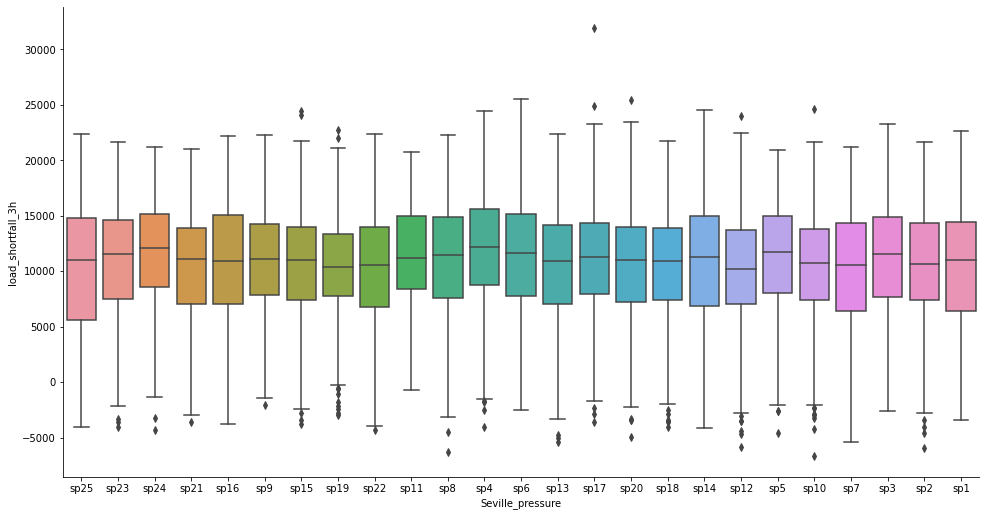

In [16]:
# Displays the relationship between the load shortfall and Seville Pressure

sns.catplot(data=df_copy,x="Seville_pressure", y="load_shortfall_3h", kind="box",
            height=7.27, aspect=15.7/8.27)

***


+ **Results** : The above plots shows a quite a few outliers for both Seville Pressure and Valencia wind degree features .


***

#### 3.6.3 The graphical representation of the load_shortfall_3h over time. 

By using the `sns.lineplot()` plot we can categorise the load shortfall dataset's time frame.

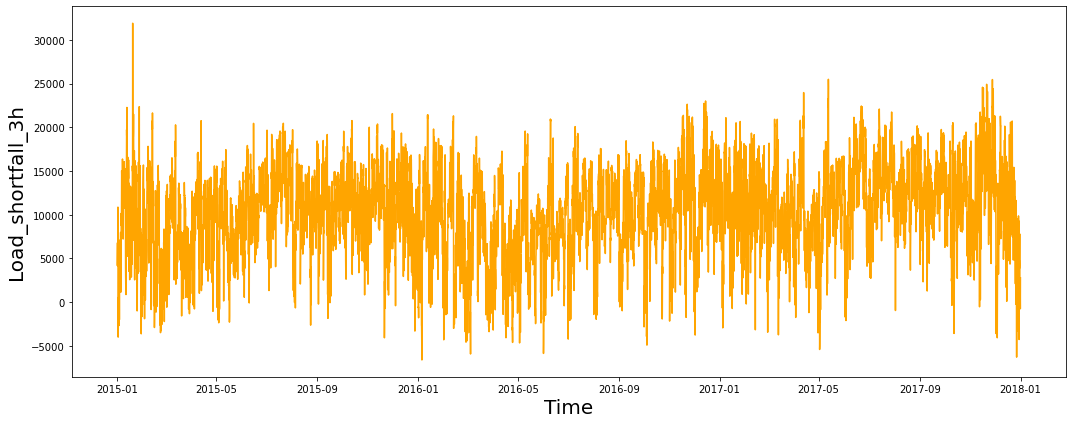

In [22]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "time", y = "load_shortfall_3h",
            color = 'orange', data = df_copy, ax = ax)

# Set labels
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

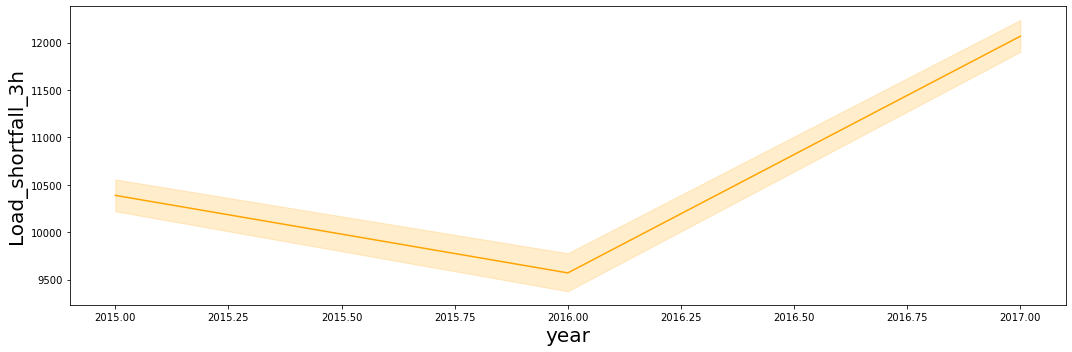

In [23]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 5))
sns.lineplot( x = "Year", y = "load_shortfall_3h",
            color = 'orange', data = df_copy, ax = ax)

# Set labels
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The load shortfall shows a steady increase a few months into the year of 2016 up to the beginning of 2017.


***

#### 3.6.4 The `load_shortfall_3h` vs the `month`

The `sns.lineplot()` below represents the load shortfall during the months of the year.


| Code    | Months          | 
|---------|-----------------|
| 1       | January         | 
| 2       | February        | 
| 3       | March           | 
| 4       | April           | 
| 5       | May             |             
| 6       | June            |
| 7       | July            |
| 8       | August          |
| 9       | September       |
| 10      | October         |
| 11      | November        |
| 12      | December        |

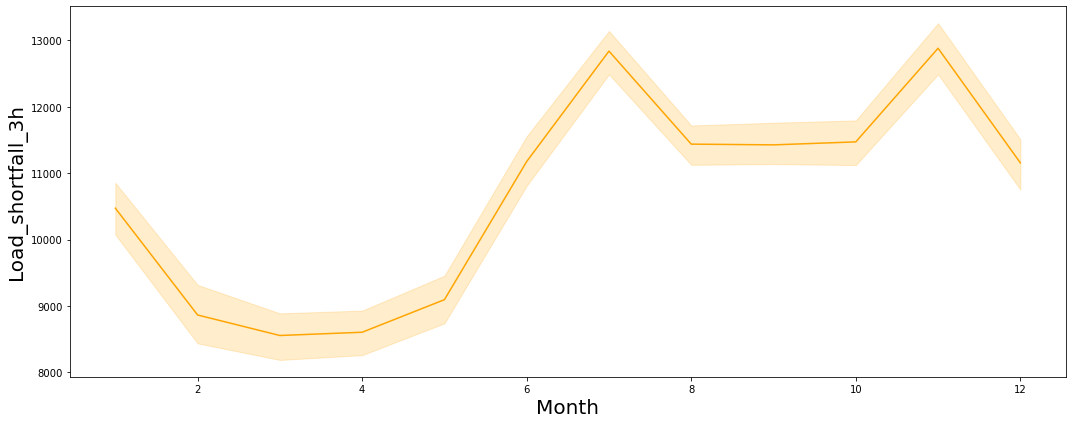

In [24]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Month", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The line graph seen above, exhibits the load shrotfall to have two increase peaks i.e. July and November. 


***

#### 3.6.5 The `load_shortfall_3h` vs the `Start_weekday`

The `sns.lineplot` below displays the load shortfall's change during the week days.

| Code    |Day of the Week | 
|---------|----------------|
| 0       | Monday         | 
| 1       | Tuesday        | 
| 2       | Wednesday      | 
| 3       | Thursday       | 
| 4       | Friday         |             
| 5       | Saturday       |
| 6       | Sunday         |

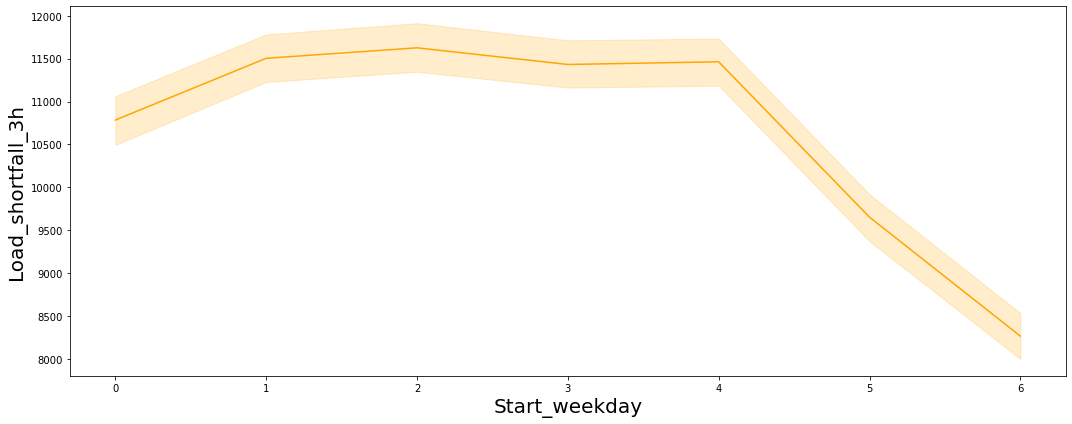

In [25]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Start_weekday", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Start_weekday', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : The line graph seen above, highlights the load shortfall to be at it's highest on a Tuesday and Wednesday. The plot also shows a drop in the load shortfall from Friday to Sunday.


***

### 3.7 Correlation 

The figure below shows the relationships between the various features using a correlation heatmap (`sns.heatmap()`).

In [26]:
df_copy.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612,0.029713,0.331189,0.942808,1.271504e-03,NaN,NaN,1.555882e-03
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.029954,-0.237445,-0.031553,1.862275e-01,NaN,NaN,-4.042128e-04
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,0.072752,-0.188274,-0.200747,5.452669e-02,NaN,NaN,3.232531e-02
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.000340,-0.237156,-0.012650,2.041029e-01,NaN,NaN,1.896518e-02
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,0.032979,-0.111622,-0.045730,-4.249821e-01,NaN,NaN,8.265003e-03
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,0.047372,-0.076567,-0.084456,-3.078718e-01,NaN,NaN,4.108225e-03
Bilbao_clouds_all,-0.068123,0.244001,0.37073

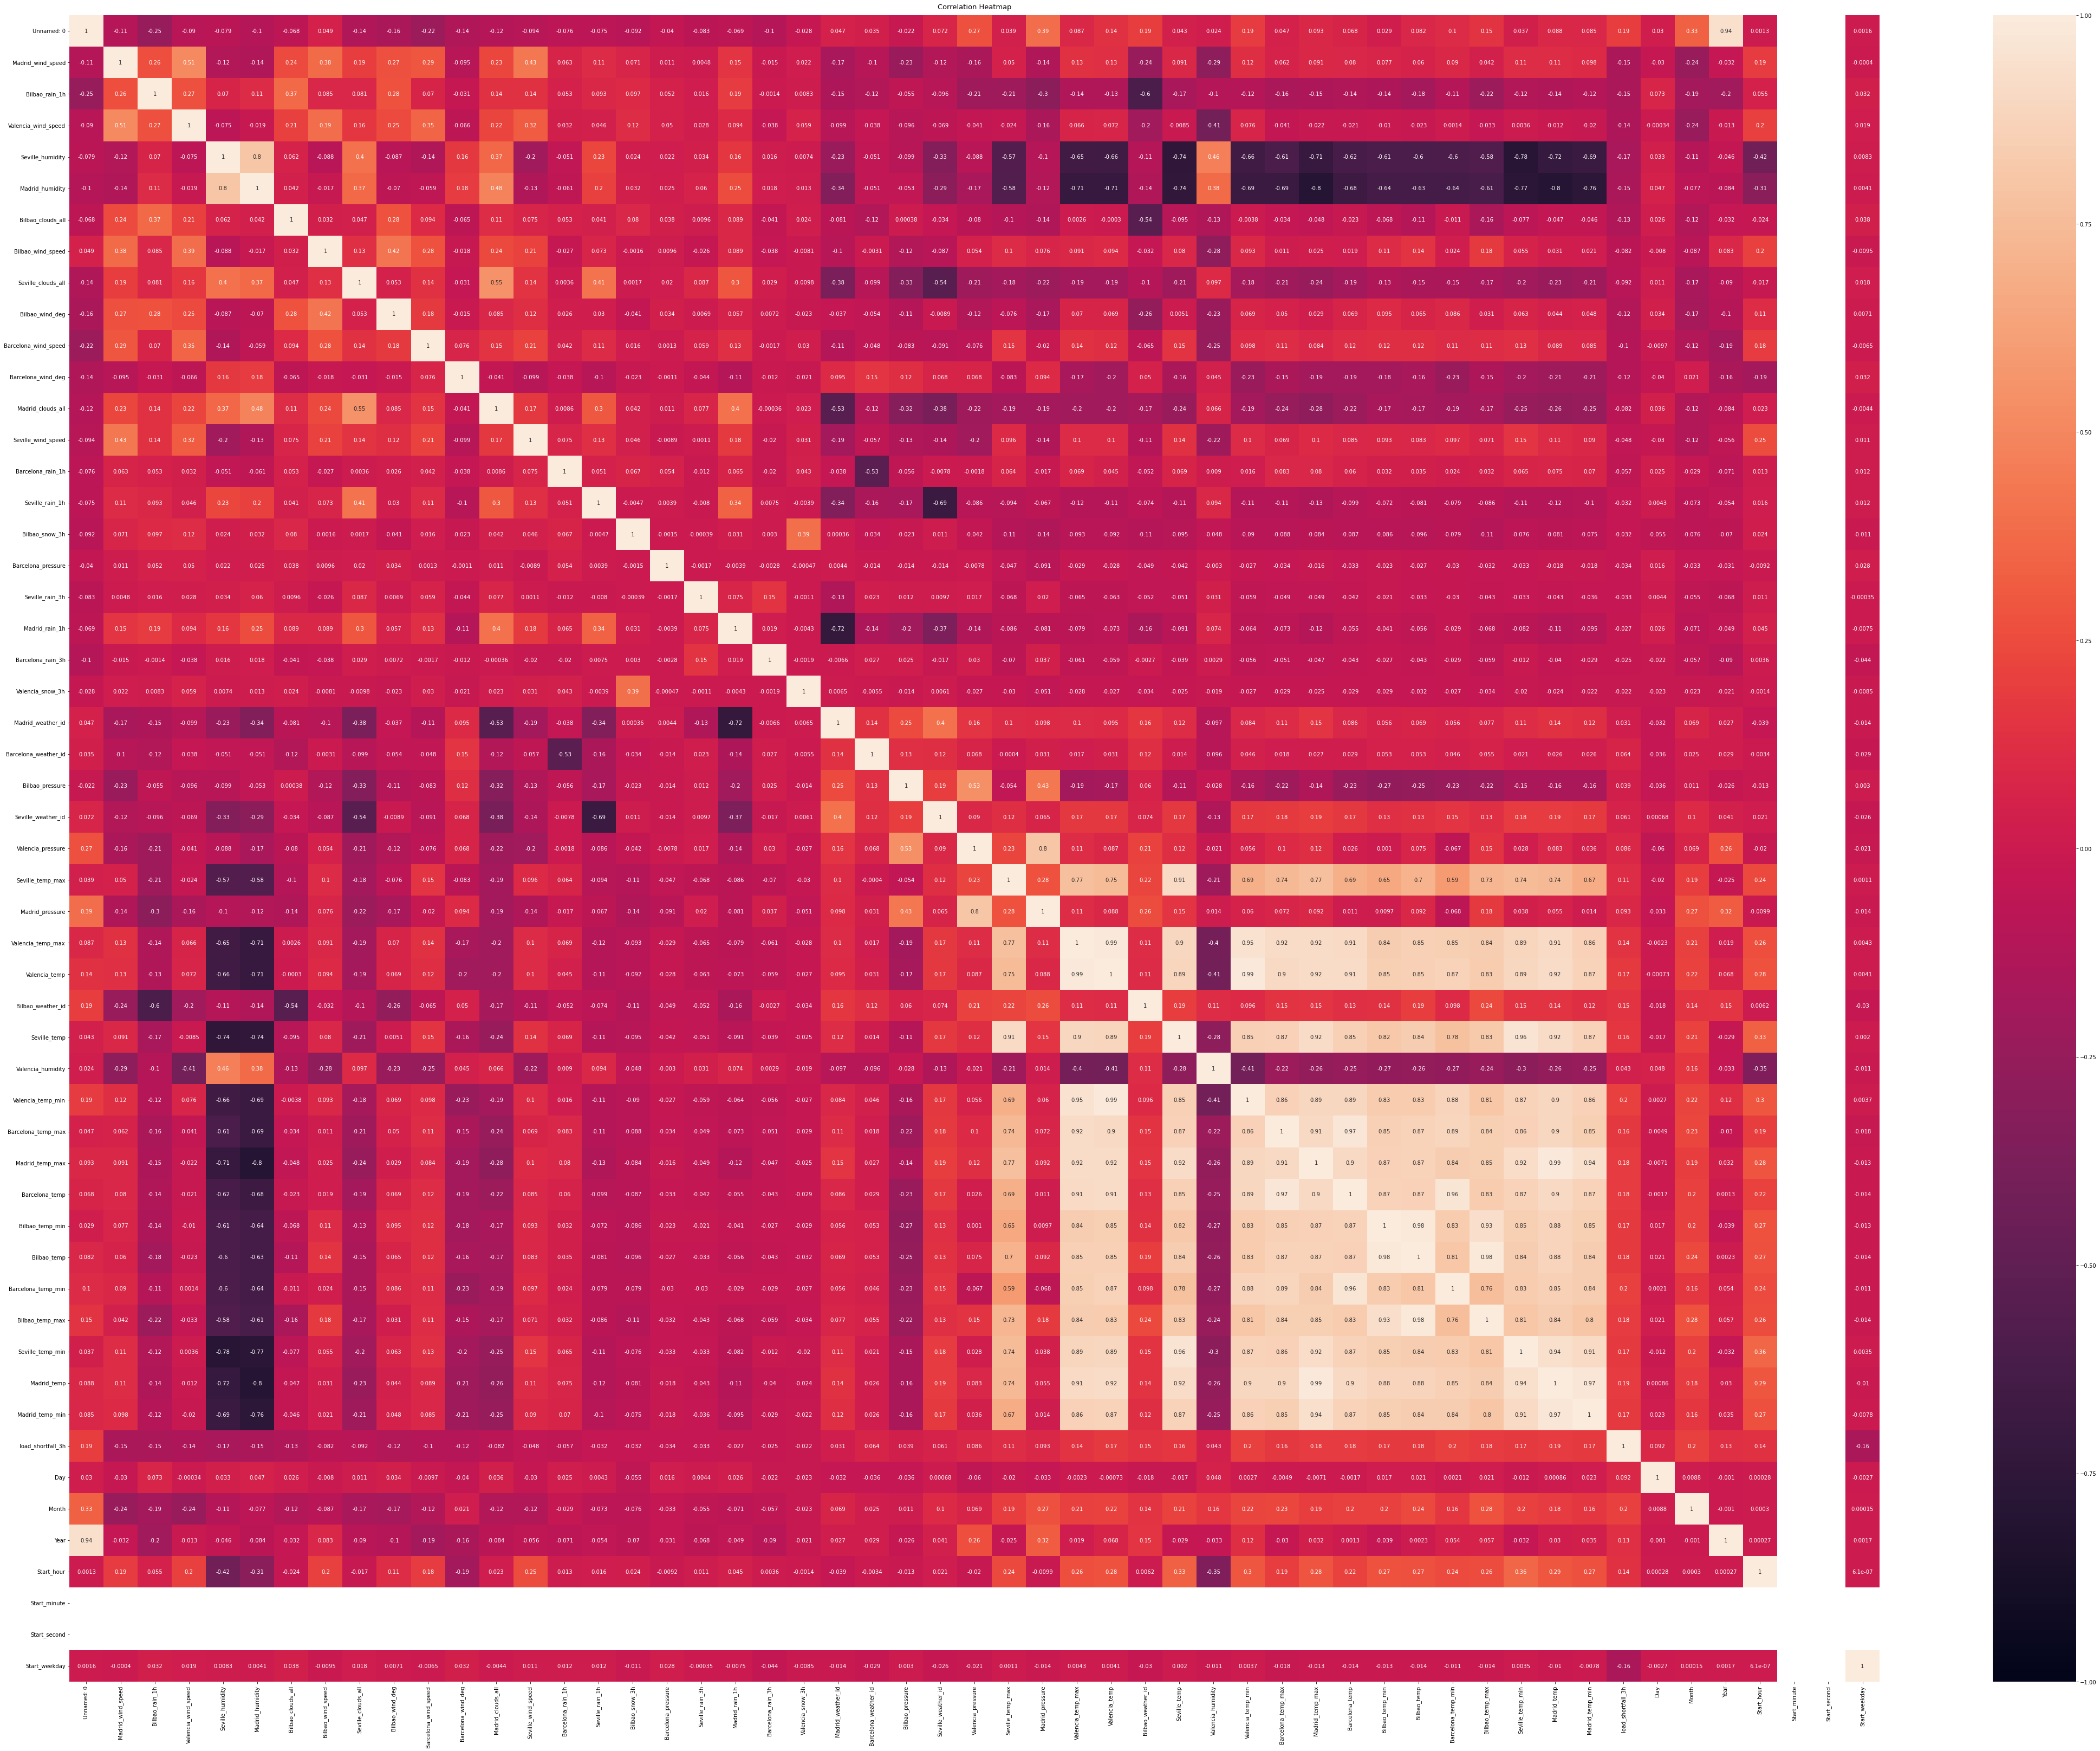

In [27]:
plt.figure(figsize=(60,45))
heatmap = sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12);

***


+ **Results** : 
Using the city of Madrid as an example:

madrid_temp to madrid_wind_speed = 0.109572 there is a weak positive correlation between madrid_temp and wind_speed

madrid_temp to humidity = -0.759633 there is a moderate negative correlation between madrid_temp and humidity

madrid_temp to clouds_all = -0.245475 there is a weak negative correlation between madrid_temp and clouds

madrid_temp to rain1h = -0.094601 there is a weak negative correlation between madrid_temp and rain1h

madrid_temp to weatherid = 0.123498

madrid_temp to pressure = 0.014089 there is a weak positive correlation between madrid_temp and pressure

***

***


+ **Results** : 


***

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



Data Engineering is the process before Modelling. It hereby fixes or removes duplicated, incorrect, incomplete or incorrectly captured data within a dataset.

### 4.1 Dropping Columns

`.drop` function is used to remove unnecessary columns.

In [63]:
# Drop unwanted columns
df_copy = df_copy.drop(['time','Unnamed: 0'], axis=1)

***


+ **Results** : The dataframe has a index therefore the 'Unnamed:0' column does not add value to it and subsequent possible prediction. As we've already added new features from the time column, the time column was not needed for subsequent analyses.


***

In [29]:
df_copy.shape

(8763, 54)

### 4.2 Dealing with Missing Values 

The feature, Valencia_pressure consists of missing values and therefore, the rows require numerical values in order for a model to be trained on.

In [53]:
# Fill in the missing values using the median
df_copy['Valencia_pressure'] = df_copy.Valencia_pressure.fillna(df_copy.Valencia_pressure.median())

***


+ **Results** : The median was used to fill in the missing values of the column , Valencia pressure. Median has shown to be more robust in regards to extreme outliers.


***

### 4.3 Creating New Features

#### 4.2.1 The `.to_datetime()` method converts the string object dtype of the *time* column.

In [54]:
# Displays the conversion into a datetime object
df_copy['time']=pd.to_datetime(df_copy['time'])

df_copy.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

***


+ **Results** : The time variable was converted to a datetime64 dtype.


***

#### 4.2.2 We decided to create new features from the time variable and add them to the dataframe. These features were inspected in the EDA.

In [55]:
# Creates new features of the time column

# Day
df_copy['Day'] = df_copy['time'].dt.day

# Month
df_copy['Month'] = df_copy['time'].dt.month

# Year
df_copy['Year'] = df_copy['time'].dt.year

# Hour
df_copy['Start_hour'] = df_copy['time'].dt.hour

# Minute
df_copy['Start_minute'] = df_copy['time'].dt.minute

# Second
df_copy['Start_second'] = df_copy['time'].dt.second

# Monday is 0 and Sunday is 6
df_copy['Start_weekday'] = df_copy['time'].dt.weekday

In [56]:
# Displays the first 5 rows of the dataframe
df_copy.shape

(8763, 56)

***


+ **Results** :  Several features such as `Day`, `Month`, `Year` etc were created and added to te dataframe. 
These features allow for easy accesibility to information used in graphical plots and subsequent modelling.


***

### 4.3 Engineer existing features

#### 4.3.1 Dummy Variable Encoding 

In [57]:
# engineer existing features
df_copy = pd.get_dummies(df_copy, drop_first=True, dtype=float)

In [58]:
df_copy.shape

(8763, 87)

In [38]:
df_copy.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp11,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp14,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1015.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,5

***


+ **Results** : The above categorical columns were also converted to numerical format.


***

In [61]:
df_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Season']] = df_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Season']].astype('float')

In [46]:
df_copy.shape

(8763, 89)

In [59]:
# Output seasons column
Spring = (3, 4, 5) 
Summer = (6, 7, 8) 
Autumn = (9, 10, 11) 
Winter = (12, 1, 2) 

Season= [] 

for x in list(df_copy['time'].dt.month): 
    if x in Spring:
        Season.append(1) 
    elif x in Summer:
        Season.append(2) 
    elif x in Autumn:
        Season.append(3) 
    else:
        Season.append(4) 



In [60]:
df_copy['Season']=Season

In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Madrid_wind_speed           8763 non-null   float64
 1   Bilbao_rain_1h              8763 non-null   float64
 2   Valencia_wind_speed         8763 non-null   float64
 3   Seville_humidity            8763 non-null   float64
 4   Madrid_humidity             8763 non-null   float64
 5   Bilbao_clouds_all           8763 non-null   float64
 6   Bilbao_wind_speed           8763 non-null   float64
 7   Seville_clouds_all          8763 non-null   float64
 8   Bilbao_wind_deg             8763 non-null   float64
 9   Barcelona_wind_speed        8763 non-null   float64
 10  Barcelona_wind_deg          8763 non-null   float64
 11  Madrid_clouds_all           8763 non-null   float64
 12  Seville_wind_speed          8763 non-null   float64
 13  Barcelona_rain_1h           8763 

In [87]:
df_copy.shape

(8763, 86)

### 4.4 Correlation Matrix

Correlation matrix of new features and time.

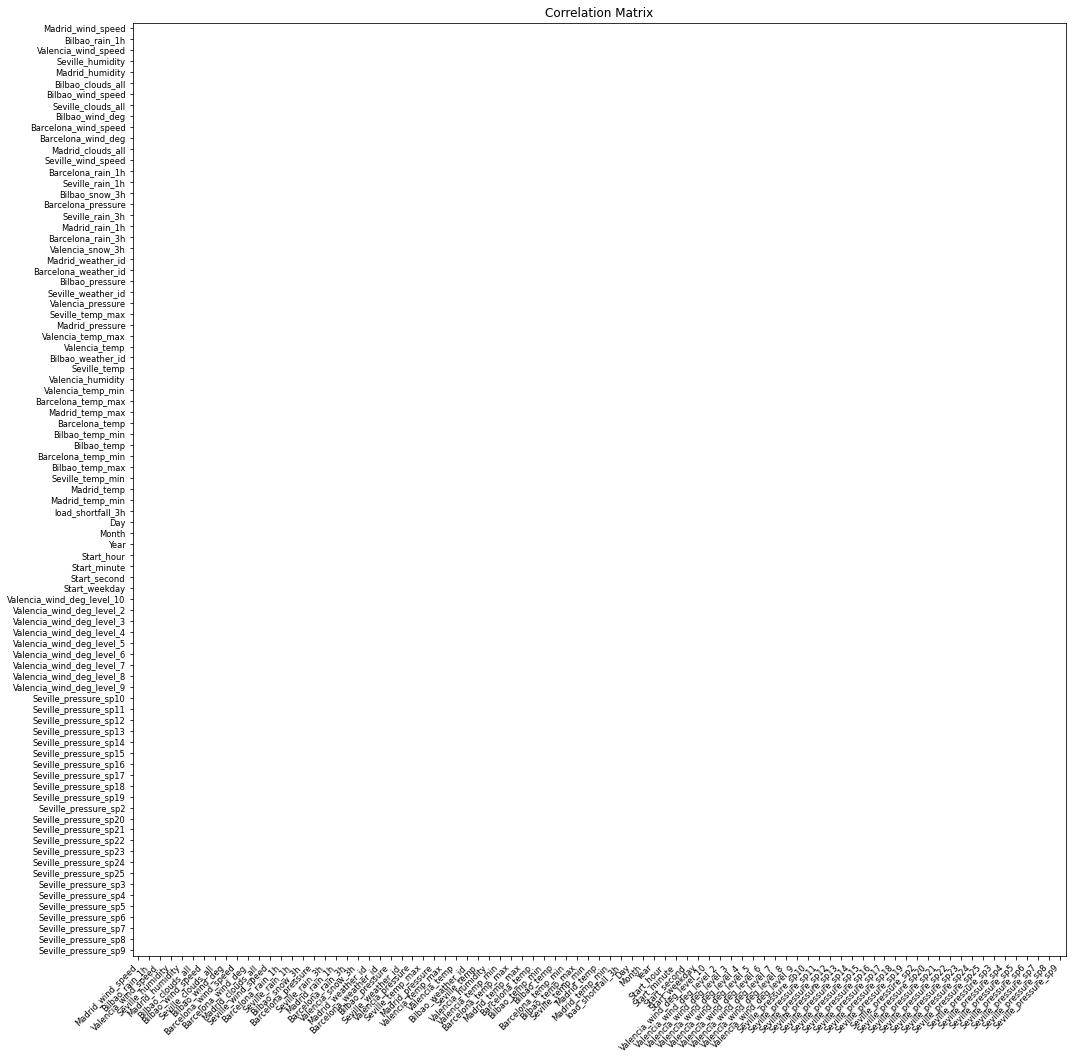

In [42]:
# Needs to be fixed
x = [col for col in df_copy.columns if col==('Month','Year','Start_weekday')]
y=['load_shortfall_3h']
df_copy_2=df_copy.reindex(x+y)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plot_corr(df_copy_2.corr(), xnames = df_copy_2.corr().columns, ax = ax)
plt.show()

### 4.5 Data Scaling

In [88]:
# split data
X = df_copy.drop(['load_shortfall_3h'], axis=1)
y = df_copy['load_shortfall_3h']

In [89]:
# create scaler object
scaler = MinMaxScaler()

# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# convert the scaled predictor values into a dataframe
X_normalize = pd.DataFrame(X_scaled,columns=X.columns)

In [90]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [91]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
col_names =X_new.columns

# View first few entries
X_new.head()

,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_deg,Madrid_clouds_all,Seville_temp_max,Madrid_pressure,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_weekday,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,Seville_pressure_sp12,Seville_pressure_sp13,Seville_pressure_sp15,Seville_pressure_sp16,Seville_pressure_sp17,Seville_pressure_sp18,Seville_pressure_sp19,Seville_pressure_sp2,Seville_pressure_sp20,Seville_pressure_sp21,Seville_pressure_sp22,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp8,Season
0,0.720000,0.615658,0.00,0.0,0.621521,0.118519,0.0,0.045263,0.395770,0.000000,0.993296,0.051072,0.728625,0.211393,0.019286,0.279352,0.091896,0.019827,0.021028,0.0,0.0,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.763636,0.622776,0.00,0.0,0.615028,0.386111,0.0,0.059520,0.407855,0.045397,0.993296,0.067158,0.676580,0.200628,0.028350,0.266986,0.107351,0.029145,0.030910,0.0,0.0,0.0,0.285714,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.687273,0.619217,0.00,0.0,0.596475,0.905556,0.0,0.138971,0.419940,0.200319,0.993296,0.156803,0.617100,0.225004,0.156067,0.294986,0.193478,0.160443,0.170162,0.0,0.0,0.0,0.428571,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.621818,0.533808,0.00,0.0,0.555659,0.758333,0.0,0.275318,0.607251,0.370302,0.993296,0.310647,0.486989,0.269139,0.341654,0.345683,0.341284,0.351233,0.372508,0.0,0.0,0.0,0.571429,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.552727,0.540925,0.02,0.0,0.514842,0.722222,0.0,0.277791,0.975831,0.323817,0.993296,0.313437,0.535316,0.287721,0.317073,0.367027,0.343964,0.325963,0.345707,0.0,0.0,0.0,0.714286,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
X_new.shape

(8763, 54)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1 Splitting the Dataset

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [94]:
# Create ridge model
ridge = Ridge()

In [95]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [96]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

***


+ **Results** : 


***

### 5.2 Train-Test Split

In [97]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

***


+ **Results** : We declare a Linear Regression model object named lm. We split our training data into 80% (X_train and y_train) for training and 20% (X_test, y_test) for the validation test. 


***

In [ ]:
# By plotting the data points in each of the training and testing sets in different colours, 
# we should be able to see that we have a similar spread of data in each (but far fewer data 
# points in the testing set).

# Plot the results
# plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
# plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
# plt.legend()
# plt.show()

In [98]:
#using XGBoost model
xgbmodel = xg.XGBRegressor(n_estimators = 200, learning_rate=0.05,random_state = 150)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)
xgb_score = cross_val_score(xgbmodel, X, y, scoring="neg_mean_squared_error", cv=10)
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=150,
             reg_alpha=0, reg_lambda=1, ...)

In [99]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 150)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=150)

### 5.3 Machine Learning Models

#### 5.4.1 Linear Regression

In [100]:
# Here we create the linear model object (lm)
lm = LinearRegression()

In [101]:
# Here we execute the fit function on our linear regression model in order to train it 
#using our training dataset from above.

lm.fit(X_train, y_train)

LinearRegression()

***


+ **Results** : We declare a linear regression model as lm and we feed it with our predictor variables training set and the variable to be predicted y_train in this instance to fit our model.


***

#### 5.4.2 XGBoost Regression

In [102]:
#Here we create the XGBoost Regressor model with some parameters
xgbmodel = xg.XGBRegressor(n_estimators = 200, learning_rate=0.05,random_state = 150)

In [103]:
#here we train our XGBoost model with the train dataset
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=150,
             reg_alpha=0, reg_lambda=1, ...)

***


+ **Results** : 


***

#### 5.4.3 Random Forest REgression

In [104]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 150)

In [105]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=150)

***


+ **Results** : 


***

#### 5.4.4 Lasso Regression

In [ ]:
# scale = StandardScaler()
# df_change_sta = scale.fit_transform(df_test_copy)

***


+ **Results** : 


***

### 5.4 Evaluation of the Machine Learning Models

NameError: name 'ax' is not defined

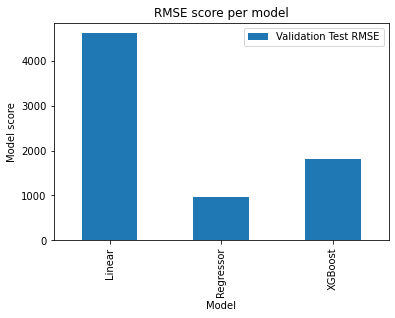

In [114]:
predictedY = {
#                 'Training_MSE':
#                     {
#                         "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train)),
#                         "XGBoost": metrics.mean_squared_error(y_train, xgbmodel.predict(X_train)),
#                         "Regressor": metrics.mean_squared_error(y_train, regressor.predict(X_train))
                        
#                     },
#                 'Validation_Test_MSE':
#                     {
#                         "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test)),
#                         "XGBoost": metrics.mean_squared_error(y_test, xgbmodel.predict(X_test)),
#                         "Regressor": metrics.mean_squared_error(y_test, regressor.predict(X_test))
#                     },
                'Validation Test RMSE':
                    {
                        "Linear": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))),
                        "XGBoost": math.sqrt(metrics.mean_squared_error(y_test, xgbmodel.predict(X_test))),
                        "Regressor": math.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test)))
                    }
                }

#print(metrics.r2_score(y_test, lm.predict(X_test)))

# create dataframe from dictionary
results_df = pd.DataFrame(data=predictedY)
 
#rmse_bar_plot = results_df.plot.bar(x='', y='val', rot=0)
rmse_bar_plot = results_df.plot(kind="bar")

plt.title("RMSE score per model")
plt.xlabel("Model")
plt.ylabel("Model score")
plt.bar_label(axt.containers[0])

plt.show()

In [107]:
X_test.shape

(1753, 85)

***


+ **Results** : 


***

In [ ]:
# create targets and features dataset

### 5.5 Test the model on the test dataset

***


+ **Results** : 


***

<a id="five"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Determine using the RMSE

***


+ **Results** : 


***

### 6.1 Chosen Model will be tested on the Test Dataset

In [65]:
#Loading the dataset
df_test = pd.read_csv('df_test.csv')

In [66]:
#copy the real test data
df_test_copy = df_test.copy()

In [67]:
df_test_copy.shape

(2920, 48)

In [68]:
# Creates new features of the time column
df_test_copy['time']=pd.to_datetime(df_test_copy['time'])

In [69]:
# Creates new features of the time column

# Day
df_test_copy['Day'] = df_test_copy['time'].dt.day

# Month
df_test_copy['Month'] = df_test_copy['time'].dt.month

# Year
df_test_copy['Year'] = df_test_copy['time'].dt.year

# Hour
df_test_copy['Start_hour'] = df_test_copy['time'].dt.hour

# Minute
df_test_copy['Start_minute'] = df_test_copy['time'].dt.minute

# Second
df_test_copy['Start_second'] = df_test_copy['time'].dt.second

# Monday is 0 and Sunday is 6
df_test_copy['Start_weekday'] = df_test_copy['time'].dt.weekday

In [70]:
df_test_copy.shape

(2920, 55)

In [72]:
# Output seasons column
Spring = (3, 4, 5) 
Summer = (6, 7, 8) 
Autumn = (9, 10, 11) 
Winter = (12, 1, 2) 

Season= [] 

for x in list(df_test_copy['time'].dt.month): 
    if x in Spring:
        Season.append(1) 
    elif x in Summer:
        Season.append(2) 
    elif x in Autumn:
        Season.append(3) 
    else:
        Season.append(4) 


In [80]:
df_test_copy['Season']=Season

In [73]:
#changes to test
df_test_copy['Valencia_pressure'] = df_test_copy.Valencia_pressure.fillna(df_test_copy.Valencia_pressure.median())

In [81]:
df_test_copy = pd.get_dummies(df_test_copy, drop_first=True,  dtype=float)

In [82]:
df_test_copy.shape

(2920, 85)

In [83]:
# Drop unwanted columns
df_test_copy = df_test_copy.drop(['time','Unnamed: 0'], axis=1)

KeyError: "['time', 'Unnamed: 0'] not found in axis"

In [84]:
df_test_copy.shape

(2920, 85)

In [85]:
df_test_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Bilbao_snow_3h','Valencia_snow_3h','Season']] = df_test_copy[['Day','Month','Year','Start_hour','Start_minute','Start_second','Start_weekday','Bilbao_snow_3h','Valencia_snow_3h','Season']].astype('float')

In [86]:
df_test_copy.shape

(2920, 85)

In [108]:
xgbmodel.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=150,
             reg_alpha=0, reg_lambda=1, ...)

In [109]:
#Here we train our model using entire train dataset from the train.csv
regressor.fit(X,y)

RandomForestRegressor(n_estimators=200, random_state=150)

In [110]:
#test model using the real test dataset i.e. predict the actual load_shedding values that 
#will be used to create our submission file.
#Random Forest model has been selected in this instance

real_predict_dataset = xgbmodel.predict(df_test_copy)

In [111]:
#extract the predicted variables into a df
df_predict_load_vals = pd.DataFrame(real_predict_dataset, columns=['load_shortfall_3h'])

In [112]:
df_predict_load_vals.head(15)

,load_shortfall_3h
0,12397.653320
1,8134.974121
2,7132.828613
3,9097.050781
4,12235.284180
5,12275.479492
6,10317.928711
7,12900.534180
8,11285.562500
9,5935.206055


In [113]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(df_predict_load_vals)
submission.to_csv('submission.csv', index=False)

In [99]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               2920 non-null   object 
 1   load_shortfall_3h  2920 non-null   float32
dtypes: float32(1), object(1)
memory usage: 34.3+ KB


***


+ **Results** : The section above takes the predicted values from our model and converts it into a submission.csv file that contains the time and load_shortfall_3h columns.


***

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

***


+ **Conclusion** : 


***